In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("Lhasa/Lhasa_Data-CC-80.csv", index_col=0);
df["SENSING_TIME"] = df["SENSING_TIME"].map(pd.Timestamp);
df_t1 = df[df["SENSING_TIME"]=="2013-04-02"]
df_t2 = df[df["SENSING_TIME"]=="2013-04-28"]
# df = df[(df["ID"] == 1) | (df["ID"] == 2)];

tiles = df["Tile_ID"].unique();
tiles.sort();
tiles.shape

(1944,)

[200.  38.  16.  14.   6.   3.   2.   1.   1.   3.] [  8.  40.  72. 104. 136. 168. 200. 232. 264. 296. 328.]
Ideal Spacing:
8


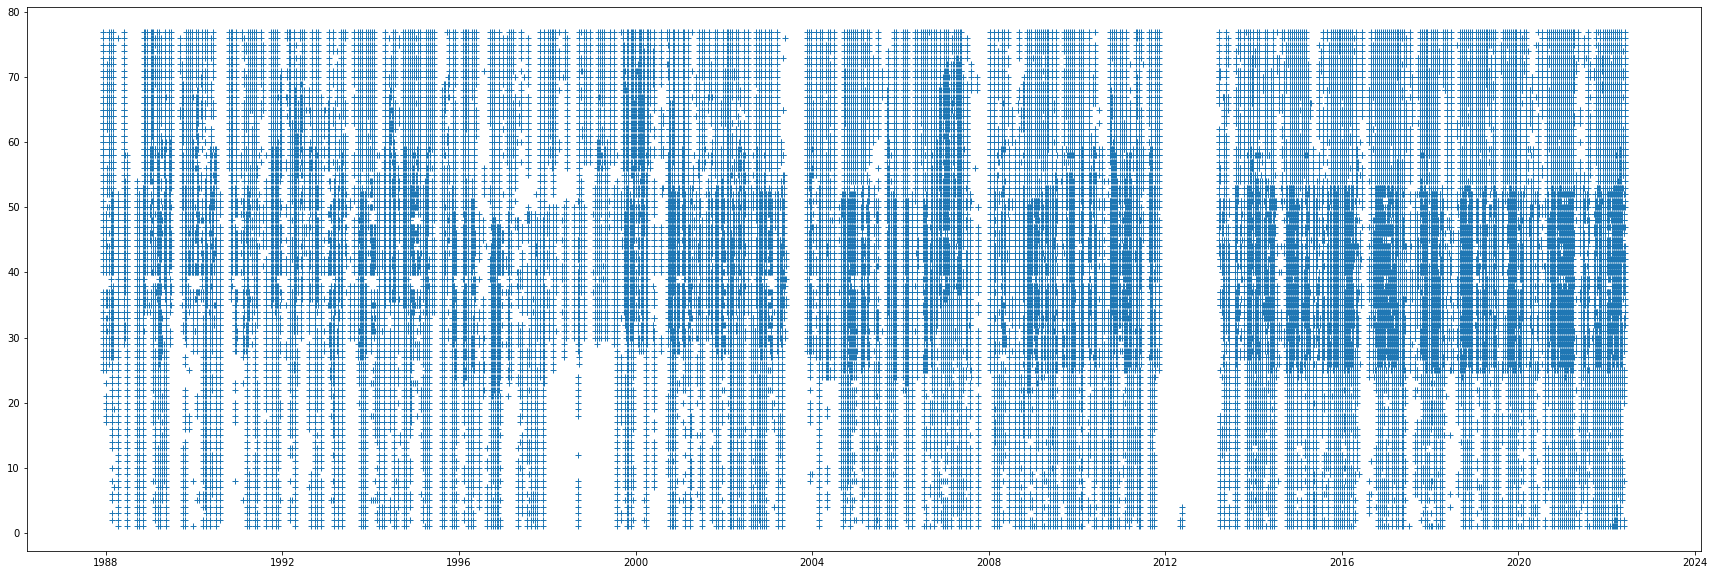

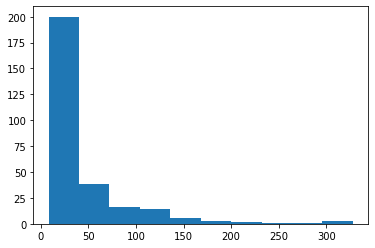

In [77]:
# Sparsity plot
data = df[["ID", "SENSING_TIME"]];
plt.figure(figsize=(30, 10));
plt.plot(data["SENSING_TIME"], data["ID"], '+');

df_c = df[df["ID"] == 1].sort_values("SENSING_TIME");
diffs = df_c['SENSING_TIME'].diff().shift(-1).map(lambda t: t.days);
plt.figure();
n, bins, *rest = plt.hist(diffs);
print(n, bins)
print("Ideal Spacing:");
print(np.gcd.reduce(bins.astype(int)));